In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


# 1. ABOUT THE DATASET

In [2]:
df=pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

In [3]:
print("No.of Rows and Columns")
df.shape

No.of Rows and Columns


(51717, 17)

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
print("Percentage NULL or NA values")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage NULL or NA values


url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

# 2. EXPLORATORY DATA ANALYSIS

**Columns Description**
1. **url** contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost(for two people)** contains the approximate cost for meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in(type)** type of meal

17. **listed_in(city)** contains the neighborhood in which the restaurant is listed

In [7]:
# Drop the duplicates

df.drop_duplicates(inplace=True)

In [8]:
# Deleting Unnnecessary/Repetitive Columns

del df['url']
del df['address']
del df['phone']
del df['listed_in(city)']

Transform columns to appropriate data types

In [9]:
# Adjust rate column 

# convert "NEW" & "-" to np.nan
df.rate.replace(('NEW','-'),np.nan,inplace =True)
# convert to string
df.rate = df.rate.astype('str')
# remove the "/5" 
df.rate = df.rate.apply(lambda x: x.replace('/5','').strip())
# convert column type to float
df.rate = df.rate.astype('float')

In [10]:
# Adjust cost column

# convert to string
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('str')
# remove the ","
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
# convert column type to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float')

In [11]:
# convert to bool
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [12]:
# Rename columns

zomato = df
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'meal_type'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'meal_type'],
      dtype='object')

Fill in missing values in rate column by extracting rate from reviews_list

In [13]:
# return to a list of tuples
import ast
zomato.reviews_list = zomato.reviews_list.apply(lambda x: ast.literal_eval(x))

In [14]:
# extract the rate value out of a string inside tuple
def get_rate(x):
    
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

In [15]:
# create new temporary column to store rate from reviews
zomato['review_rate']  = zomato.reviews_list.apply(lambda x : get_rate(x))

In [16]:
# apply the changes
nan_index = zomato.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    zomato.loc[i,'rate'] = zomato.loc[i,'review_rate'] 

In [17]:
# drop the review_rate column
zomato.drop(columns='review_rate',axis=1,inplace=True)

In [18]:
# Drop null values
zomato.dropna(subset=['rate', 'cost'],inplace=True)

In [19]:
print("Percentage NULL or NA values")
((zomato.isna().sum()/zomato.shape[0])*100).round(2)

Percentage NULL or NA values


name             0.00
online_order     0.00
book_table       0.00
rate             0.00
votes            0.00
location         0.00
rest_type        0.34
dish_liked      45.28
cuisines         0.02
cost             0.00
reviews_list     0.00
menu_item        0.00
meal_type        0.00
dtype: float64

Fill in missing values in dish_liked column by extracting dish names from reviews_list

In [20]:
# clear the text
def clear_text(t):
    
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [21]:
# make a new column reviews_text
zomato['reviews_text'] = zomato.reviews_list.apply(lambda x: clear_text(x))

In [22]:
# convert to lower case
zomato.dish_liked = zomato.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [23]:
# collect the dishes' names and make a menu list for all kind of dishes
menu_list = [e.strip() for i in zomato.dish_liked.tolist() if isinstance(i,str) and len(i) >0 for e in i.split(',')]

# collect the unique dish name 
menu_set = set(menu_list)

In [24]:
#create a new column for the reviewed dish
zomato['dish_n_review'] = zomato.reviews_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [25]:
# get sample to compare
zomato.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
30621,NaN,tea
13350,NaN,"thali, dj, beer"
17633,NaN,"paratha, coffee, tikka, cheesecake, chicken, d..."
35389,NaN,"sandwich, samosa, rasgulla, vada, chaat"
9838,NaN,"fish, chicken"


In [26]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = zomato.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    zomato.loc[i,'dish_liked'] = zomato.loc[i,'dish_n_review']

In [27]:
# drop the temporary columns
del menu_list
del menu_set
del zomato['reviews_list']
del zomato['dish_n_review']

Final changes

In [28]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())

In [29]:
#Check for percentage of null values 
((zomato.isna().sum()/zomato.shape[0])*100).round(2)

name            0.00
online_order    0.00
book_table      0.00
rate            0.00
votes           0.00
location        0.00
rest_type       0.34
dish_liked      0.00
cuisines        0.02
cost            0.00
menu_item       0.00
meal_type       0.00
reviews_text    0.00
dtype: float64

In [30]:
# Drop null values
zomato.dropna(subset=['cuisines', 'rest_type'],inplace=True)

In [31]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,meal_type,reviews_text
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,a beautiful place to dine in the interiors tak...
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,[],Buffet,had been here for dinner with family turned o...
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800.0,[],Buffet,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300.0,[],Buffet,great food and proper karnataka style full mea...
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600.0,[],Buffet,very good restaurant in neighbourhood buffet ...


In [32]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42741 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          42741 non-null  object 
 1   online_order  42741 non-null  bool   
 2   book_table    42741 non-null  bool   
 3   rate          42741 non-null  float64
 4   votes         42741 non-null  int64  
 5   location      42741 non-null  object 
 6   rest_type     42741 non-null  object 
 7   dish_liked    42741 non-null  object 
 8   cuisines      42741 non-null  object 
 9   cost          42741 non-null  float64
 10  menu_item     42741 non-null  object 
 11  meal_type     42741 non-null  object 
 12  reviews_text  42741 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(8)
memory usage: 4.0+ MB


In [33]:
num_cols = zomato._get_numeric_data().columns 
num_cols

Index(['online_order', 'book_table', 'rate', 'votes', 'cost'], dtype='object')

# 3. GRAPH VISUALIZATION

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from matplotlib import rcParams

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


Text(0.5, 1.0, 'Localities vs No.of Restaurants')

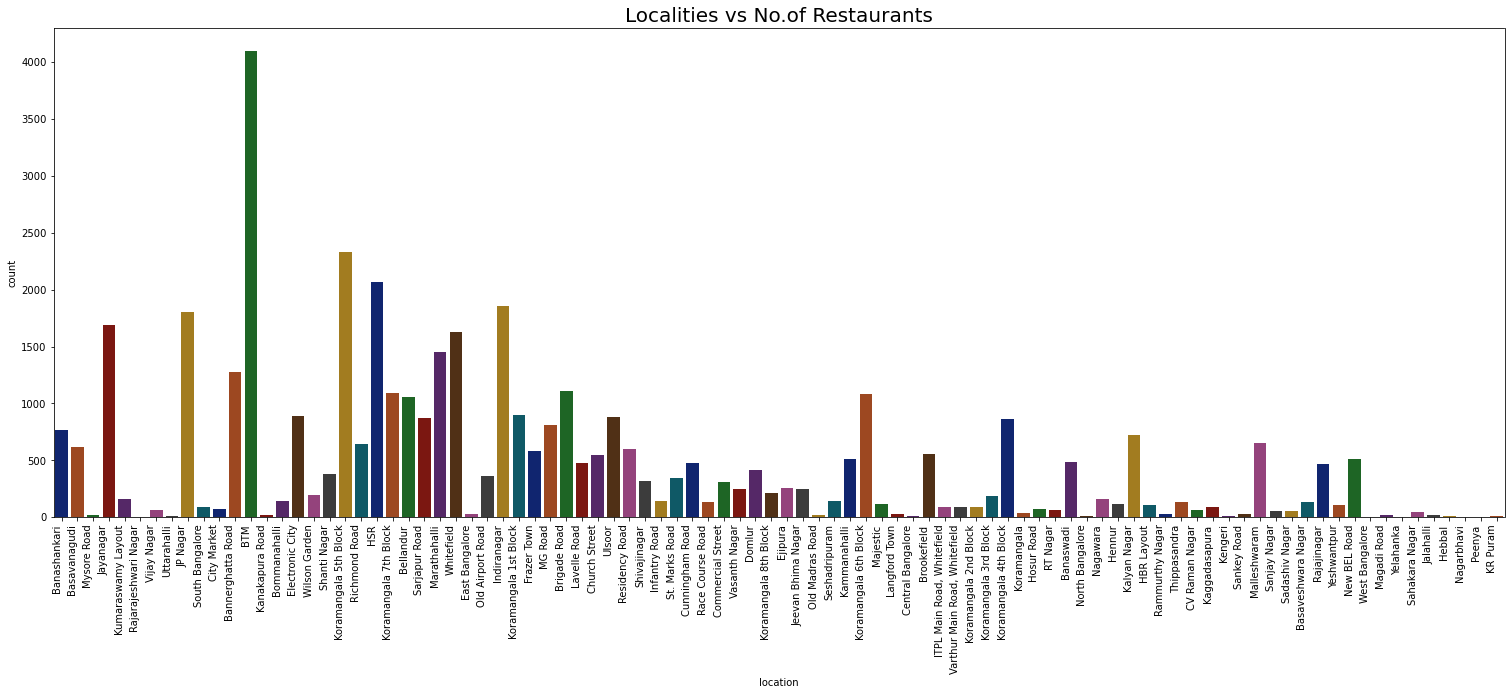

In [35]:
rcParams['figure.figsize'] = 26,9
g = sns.countplot(x="location",data=zomato, palette = "dark")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Localities vs No.of Restaurants',size = 20)

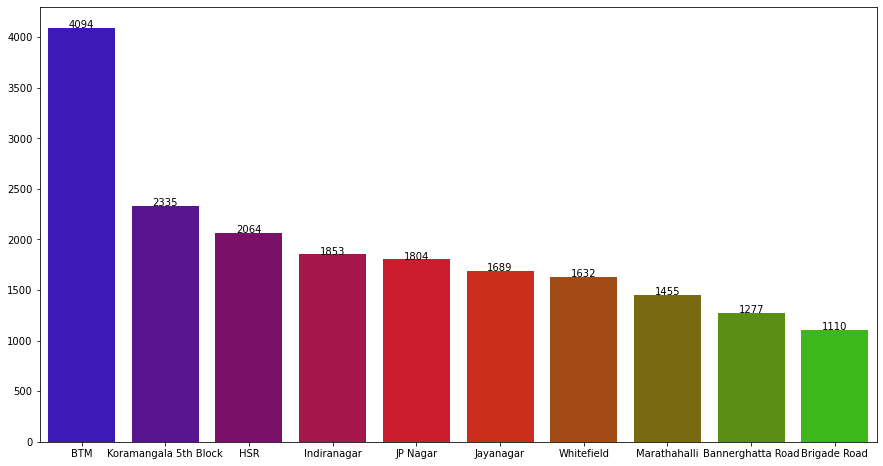

In [36]:
labels=zomato['location'].value_counts()[:10].index
values=zomato['location'].value_counts()[:10].values

plt.figure(figsize = (15, 8))
ax = sns.barplot(x=labels, y=values,palette='brg')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

Most no.of restaurants are located in BTM.

Text(0, 0.5, 'Name of Restaurant')

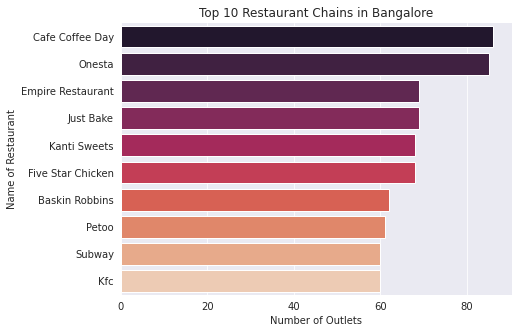

In [37]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
chains= zomato['name'].value_counts()[:10]
#online= df['']
sns.barplot(x= chains, y = chains.index, palette= 'rocket')
sns.despine()
plt.title('Top 10 Restaurant Chains in Bangalore')
plt.xlabel('Number of Outlets')
plt.ylabel('Name of Restaurant')

Cafe Coffee Day has the most no.of brand outlets in the city.

Text(0, 0.5, 'Restaurant type')

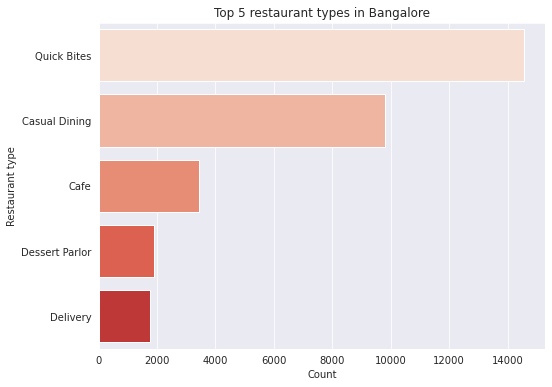

In [38]:
rest_type= zomato['rest_type'].value_counts()[:5]
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.set_palette("Reds")
sns.barplot(x= rest_type, y = rest_type.index)
plt.title('Top 5 restaurant types in Bangalore')
plt.xlabel('Count')
plt.ylabel('Restaurant type')

The most common restaurant type is Quick Bites.

Text(0.5, 0, 'Ratings')

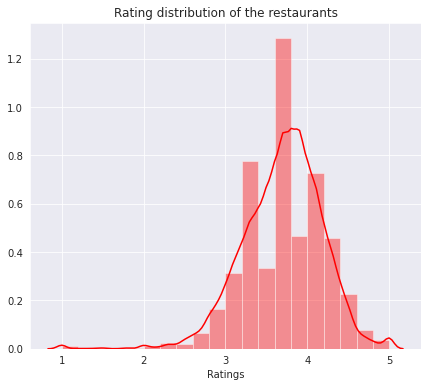

In [39]:
rating= zomato['rate']
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.distplot(rating, bins = 20,  color= 'red')
plt.title('Rating distribution of the restaurants')
plt.xlabel('Ratings')


Text(0.5, 0, 'Cost for two people')

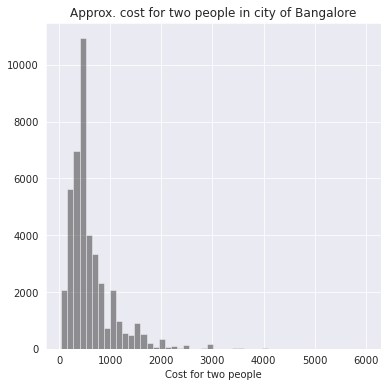

In [40]:
cost= zomato['cost']
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.distplot(cost, color= 'black',kde=False)
plt.title('Approx. cost for two people in city of Bangalore')
plt.xlabel('Cost for two people')

Text(0.5, 1.0, 'Box Plot for Cost and Type')

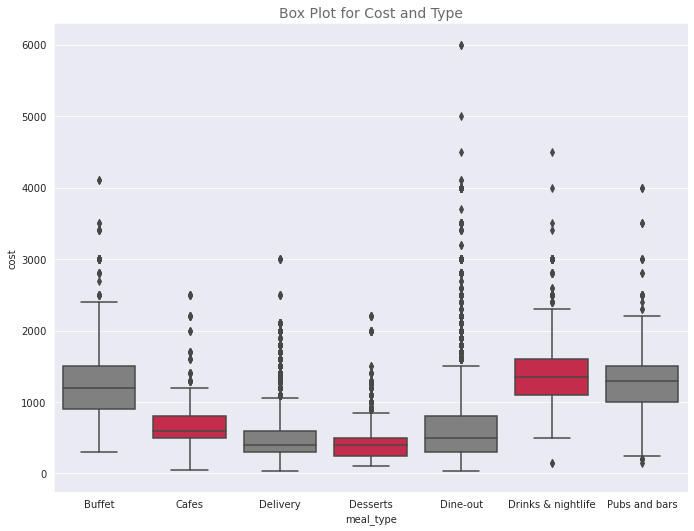

In [41]:
fig = plt.figure(constrained_layout=True, figsize=(23, 14))
gs = GridSpec(2, 5, figure=fig)
ax5 = fig.add_subplot(gs[0, 3:])
sns.boxplot(x='meal_type', y='cost', data=zomato, palette=['gray', 'crimson'], ax=ax5)
ax5.set_title('Box Plot for Cost and Type', color='dimgrey', size=14)

Text(0.5, 1.0, 'Box Plot for Cost')

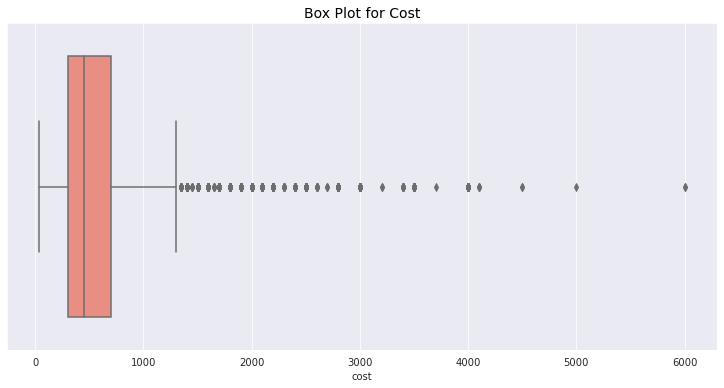

In [42]:
#sns.boxplot(x=zomato["cost"],palette='Reds')

fig = plt.figure(constrained_layout=True, figsize=(25, 10))
gs = GridSpec(2, 5, figure=fig)
ax5 = fig.add_subplot(gs[0, 3:])
sns.boxplot(x='cost', data=zomato, palette=['salmon'], ax=ax5)
ax5.set_title('Box Plot for Cost', color='black', size=14)

There are a few outliers in the cost column.

In [43]:
Q1 = zomato.quantile(0.25)
Q3 = zomato.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

online_order      1.0
book_table        0.0
rate              0.6
votes           243.0
cost            400.0
dtype: float64


In [44]:
#zomato_out = zomato[~((zomato < (Q1 - 1.5 * IQR)) |(zomato > (Q3 + 1.5 * IQR))).any(axis=1)]
#zomato_out.shape

In [45]:
#sns.boxplot(x=zomato_out['cost'], palette='Reds')
"""
fig = plt.figure(constrained_layout=True, figsize=(25, 10))
gs = GridSpec(2, 5, figure=fig)
ax5 = fig.add_subplot(gs[0, 3:])
sns.boxplot(x='cost', data=zomato_out, palette=['crimson'], ax=ax5)
ax5.set_title('Box Plot for Cost', color='dimgrey', size=14)
"""

"\nfig = plt.figure(constrained_layout=True, figsize=(25, 10))\ngs = GridSpec(2, 5, figure=fig)\nax5 = fig.add_subplot(gs[0, 3:])\nsns.boxplot(x='cost', data=zomato_out, palette=['crimson'], ax=ax5)\nax5.set_title('Box Plot for Cost', color='dimgrey', size=14)\n"

Outliers can be significantly filtered using IQR Score method.
However, since they're non-anomalous, they need not be deleted.

In [46]:
import plotly.offline as py
import plotly.graph_objs as go

In [47]:
o=zomato['online_order'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace=go.Pie(labels=o.index,values=o,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Accepting vs not accepting online orders",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

# 4. NORMALIZATION AND STANDARDIZATION

In [48]:
zomato.describe()

,rate,votes,cost
count,42741.000000,42741.000000,42741.000000
mean,3.698334,340.938490,597.772771
std,0.486326,871.364993,460.918542
min,1.000000,0.000000,40.000000
25%,3.400000,18.000000,300.000000
50%,3.700000,68.000000,450.000000
75%,4.000000,261.000000,700.000000
max,5.000000,16832.000000,6000.000000


In [49]:
#zomato_out.describe() #without outliers

In [50]:
from sklearn.preprocessing import normalize

Normalize numeric columns using normalize()

In [51]:
x=np.array([zomato['rate'],zomato['votes'],zomato['cost']])
normalizes_X=normalize(x)
print(normalizes_X)
zomato1=zomato.drop(['rate','votes','cost'],axis=1)
zomato1.insert(4,'rate',normalizes_X[0])
zomato1.insert(5,'votes',normalizes_X[1])
zomato1.insert(6,'cost',normalizes_X[2])

[[5.31658371e-03 5.31658371e-03 4.92756539e-03 ... 4.66821985e-03
  5.57592926e-03 4.40887430e-03]
 [4.00637617e-03 4.06841038e-03 4.74561720e-03 ... 1.39576976e-04
  1.22000616e-03 6.72037294e-05]
 [5.12644889e-03 5.12644889e-03 5.12644889e-03 ... 9.61209167e-03
  1.60201528e-02 9.61209167e-03]]


In [52]:
zomato1.describe()

,rate,votes,cost
count,42741.000000,42741.000000,42741.000000
mean,0.004796,0.001762,0.003831
std,0.000631,0.004505,0.002954
min,0.001297,0.000000,0.000256
25%,0.004409,0.000093,0.001922
50%,0.004798,0.000352,0.002884
75%,0.005187,0.001349,0.004486
max,0.006484,0.087013,0.038448


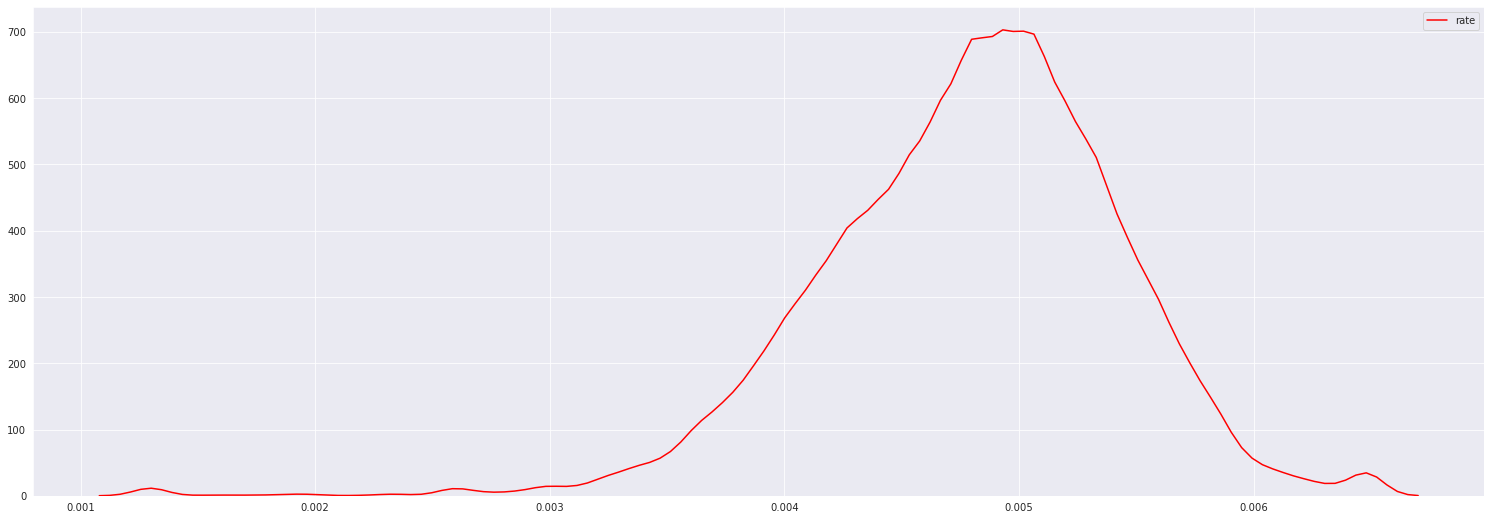

In [53]:
sns.kdeplot(zomato1['rate'],color='red')

# 5. HYPOTHESIS TESTING

If mean of cost for two ppl , x_bar=600, rating of resturant, rating=3.5

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # some useful stuff
df=pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

In [55]:
cost=zomato['cost']
mu = cost.mean()
sigma = cost.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  597.7727708757399 , sigma: 460.91315043788416


Considering a sample where rating = 3.5 yields a mean, x_bar = 600. We are testing if this hypothesis is from our dataset using z-test. First we state the null hypothesis and alternative hypothesis like this;

    H0: The sample is from the zomato restaurants, x_bar = μ.
    HA: The sample is not from the zomato restaurants, x_bar != (not equal) μ.

Then, we specify a significance (alpha) level ,α = 0.05. Next, we use a z table to look up the critical z value that cooresponds to this α level. Here we are doing a two-tailed test because we don't care if the sample mean is greater than or less than the population mean. We just are testing to see if the two are equal or not. Next we calculate the z-statitic for the sample mean compared to the population mean dividing by the standard deviation of the sample mean, which is the standard error σ/sqrt(N). If this z-statistic is less than z-critical then we accept the null hypothesis, otherwise we reject the null and accept the alternative hypothesis.

In [56]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
rating = 3.5
x_bar = 600
SE = sigma/np.sqrt(rating)
z_stat = (x_bar - mu)/SE
print(z_stat)

0.009040237078187978




Since z_stat is less than z_critical we fail to reject the null hypothesis. 

# 6. CORRELATION

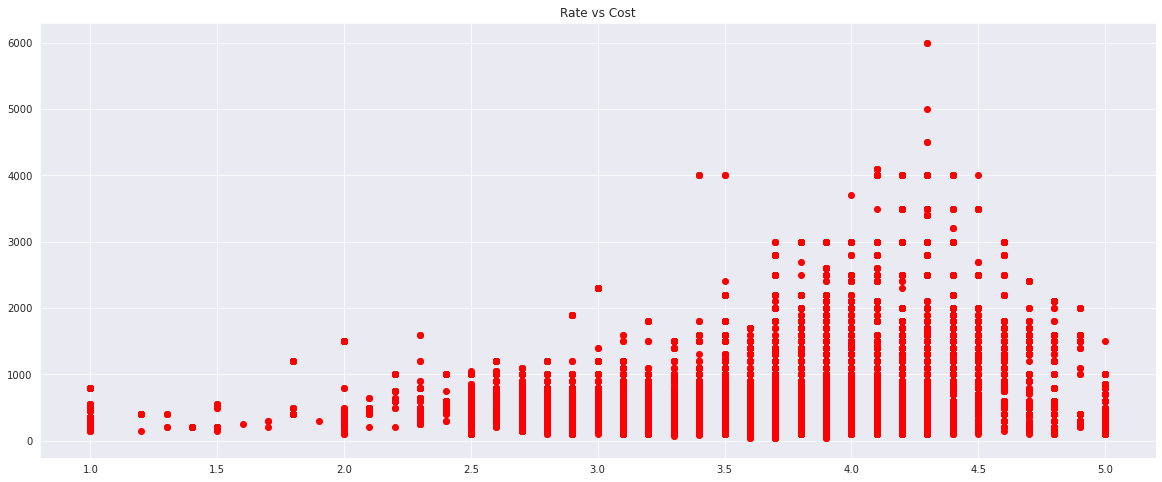

In [57]:
plt.figure(figsize=(20,8))
plt.scatter(zomato["rate"], zomato["cost"],color='red')
plt.title("Rate vs Cost")
plt.show()


This is a positive correlation i.e has a positive slope. As the rating of the restaurants increases, the cost also tends to increase.

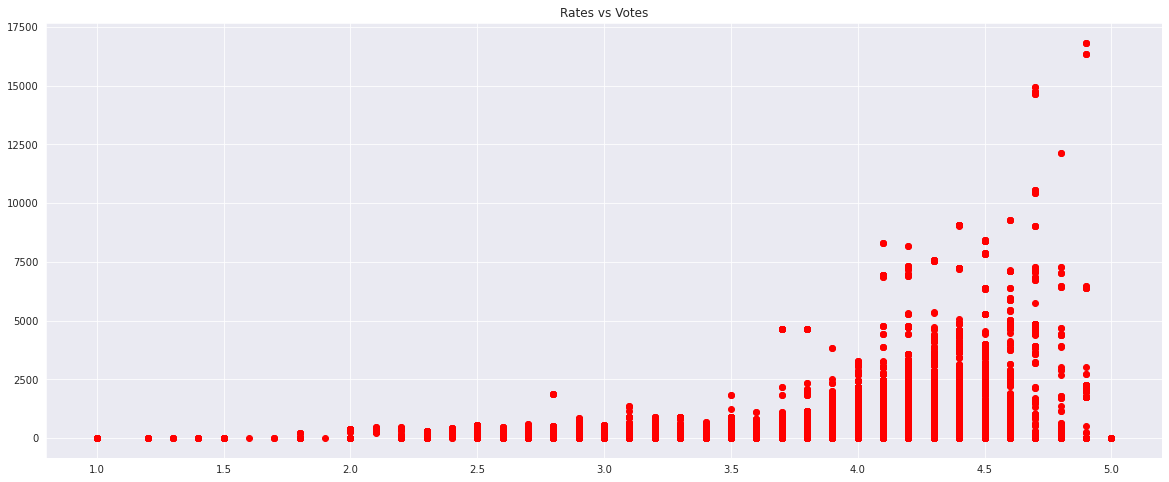

In [58]:
#Similar positive correlation
plt.figure(figsize=(20,8))
plt.scatter(zomato["rate"], zomato["votes"],color='red')
plt.title("Rates vs Votes")
plt.show()

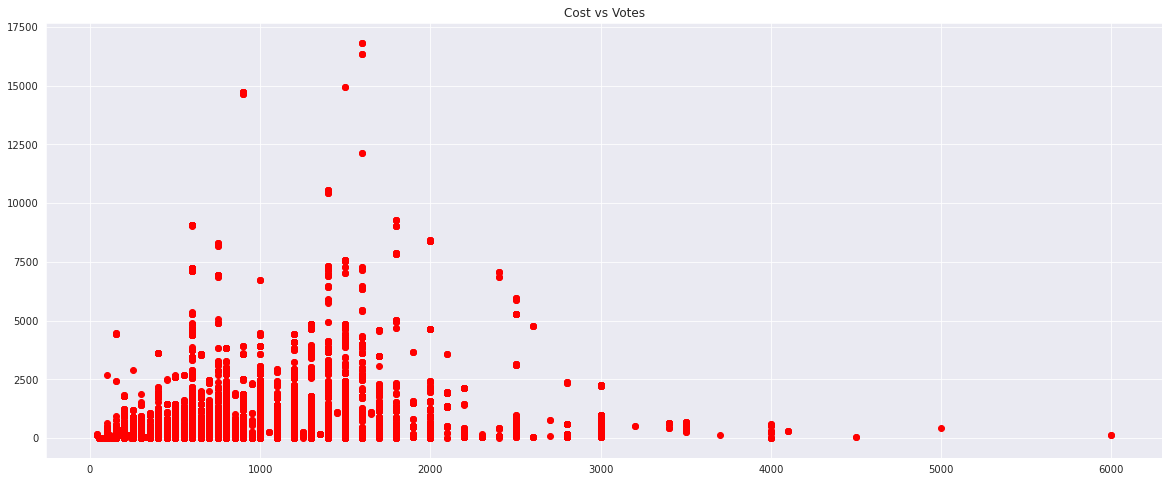

In [59]:
#Similar positive correlation
plt.figure(figsize=(20,8))
plt.scatter(zomato["cost"], zomato["votes"],color='red')
plt.title("Cost vs Votes")
plt.show()

In [60]:
#To find the coefficient of correaltion between cost and votes
corr_coeff_val=np.corrcoef(zomato["cost"], zomato["votes"])


In [61]:
#Coefficient of correaltion between cost and online_order
corr_coeff_val=np.corrcoef(zomato["cost"], zomato["online_order"])

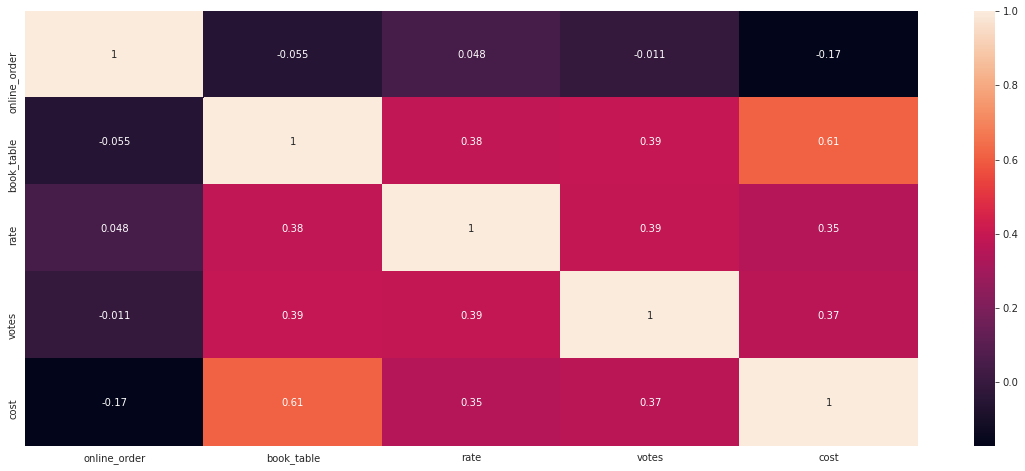

In [62]:
#Only for quantitative data
plt.figure(figsize=(20,8))
sns.heatmap(zomato.corr(), annot=True)

In [63]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,meal_type,reviews_text
0,0,0,0,4.1,775,0,0,0,0,800.0,0,0,0
1,1,0,1,4.1,787,0,0,1,1,800.0,0,0,1
2,2,0,1,3.8,918,0,1,2,2,800.0,0,0,2
3,3,1,1,3.7,88,0,2,3,3,300.0,0,0,3
4,4,1,1,3.8,166,1,0,4,4,600.0,0,0,4


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'menu_item', 'meal_type',
       'reviews_text'],
      dtype='object')

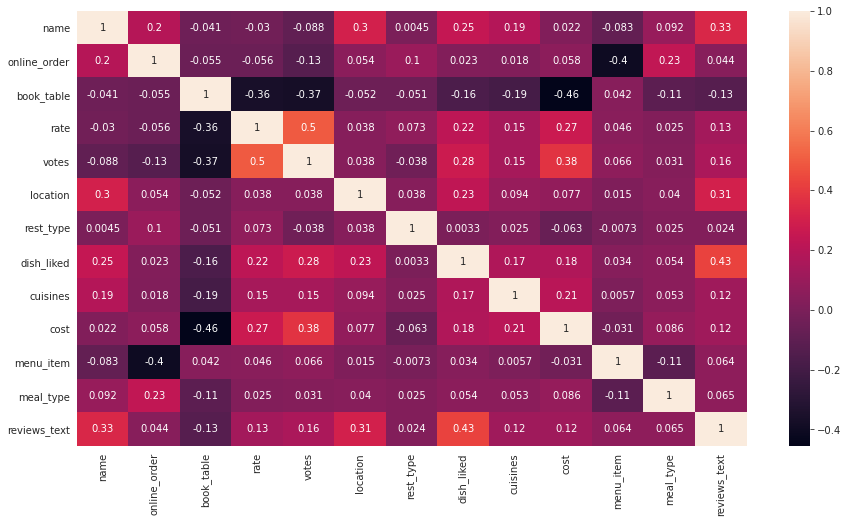

In [64]:
#Get Correlation between different variables, for all columns
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns